## Importing All Dependencies

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [44]:
main_data=pd.read_csv('heart-disease-data.csv')

main_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
data=main_data.iloc[:,:-1]
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [46]:
target=main_data.iloc[:,-1]
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

K-fold is a procedure which has lot of variations among itself, but broadly speaking it's a process of data splitting for train and test where we split the data into numerous fold, in this case being split into 10 folds as mentioned using the n_splits parameter. Among the folds one is taken as test fold and rest become train folds. Iteratively doing this gives us the best results we can get out from the data.

In [54]:
from sklearn.model_selection import KFold

k=KFold(n_splits=10)

data=np.array(data)
target=np.array(target)

for train_index,test_index in k.split(data):
    x_train,x_test=data[train_index],data[test_index]
    y_train,y_test=target[train_index],target[test_index]

In [80]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [58]:
model1=SVC(kernel='linear')
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
print(accuracy_score(y_test,pred1)*100)

60.0


In [59]:
model2=LogisticRegression()
model2.fit(x_train,y_train)
pred1=model2.predict(x_test)
print(accuracy_score(y_test,pred1)*100)

56.666666666666664


In [64]:
model3=KNeighborsClassifier(n_neighbors=2)
model3.fit(x_train,y_train)
pred1=model3.predict(x_test)
print(accuracy_score(y_test,pred1)*100)

63.33333333333333


In [72]:
from sklearn.model_selection import StratifiedKFold

s=StratifiedKFold(n_splits=10)

for train_index,test_index in s.split(data,target):
    x_train,x_test=data[train_index],data[test_index]
    y_train,y_test=target[train_index],target[test_index]

In [107]:
li=[]

model1=SVC(kernel='linear')
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
print(accuracy_score(y_test,pred1)*100)
li.append(accuracy_score(y_test,pred1)*100)

72.41379310344827


In [108]:
model2=LogisticRegression()
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)
print(accuracy_score(y_test,pred2)*100)
li.append(accuracy_score(y_test,pred2)*100)

72.41379310344827


In [109]:
model3=KNeighborsClassifier(n_neighbors=2)
model3.fit(x_train,y_train)
pred3=model3.predict(x_test)
print(accuracy_score(y_test,pred3)*100)
li.append(accuracy_score(y_test,pred3)*100)

62.06896551724138


In [110]:
li

[72.41379310344827, 72.41379310344827, 62.06896551724138]

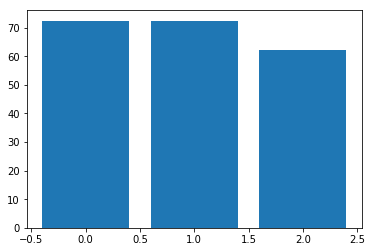

In [123]:
import matplotlib.pyplot as plt

x=np.arange(len(li))
y=np.array(li)

plt.bar(x,y)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [124]:
cross_val_score(SVC(kernel='linear'),data,target,cv=5)

array([0.81967213, 0.8852459 , 0.80327869, 0.86666667, 0.76666667])

In [125]:
cross_val_score(LogisticRegression(),data,target,cv=5)

array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [126]:
cross_val_score(KNeighborsClassifier(n_neighbors=5),data,target,cv=5)

array([0.60655738, 0.6557377 , 0.57377049, 0.73333333, 0.65      ])